In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Admission Predict/Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['GRE Score', 'TOEFL Score']] = scaler.fit_transform(df[['GRE Score', 'TOEFL Score']])

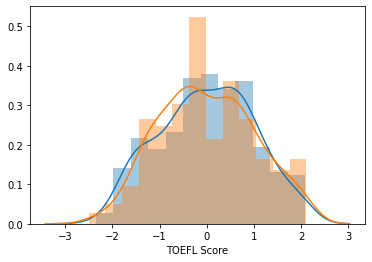

In [9]:
import seaborn as sns

sns.distplot(df['GRE Score'])
sns.distplot(df['TOEFL Score'])

In [ ]:
df.drop(['Serial No.'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:8], df.iloc[:,8], test_size=0.3, random_state=42)

In [19]:
# model 1
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

lrm.fit(X_train, y_train)
y_predict = lrm.predict(X_test)
lrm.score(X_train, y_train)

0.8264559166683193

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error as mse, mean_squared_error as mae

print(r2_score(y_test, y_predict))
print(mse(y_test, y_predict))
print(mae(y_test, y_predict))

0.8320375311635461
0.04352655863808168
0.0035006842264874325


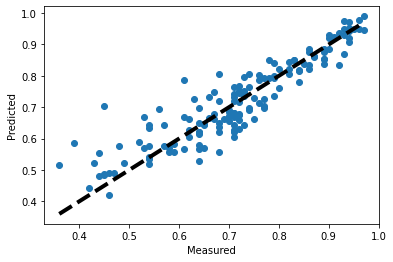

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [28]:
# model 2
from sklearn.linear_model import Ridge
rdg = Ridge(alpha = 0.1)

rdg.fit(X_train, y_train)
y_predict = rdg.predict(X_test)
rdg.score(X_train, y_train)

0.8264553402636428

In [29]:
print(r2_score(y_test, y_predict))
print(mse(y_test, y_predict))
print(mae(y_test, y_predict))

0.8320110659619333
0.04353707386881845
0.003501235815866168


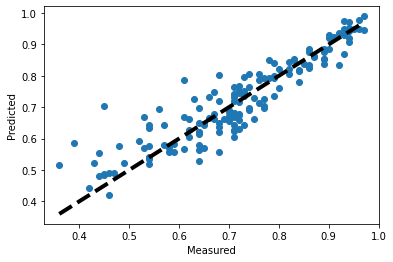

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [42]:
# model 3
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 5, min_samples_leaf = 4)

rfr.fit(X_train,y_train)
y_predict = rfr.predict(X_test)

In [43]:
print(r2_score(y_test, y_predict))
print(mse(y_test, y_predict))
print(mae(y_test, y_predict))

0.8395012582266727
0.04139007063307063
0.0033451247626280645


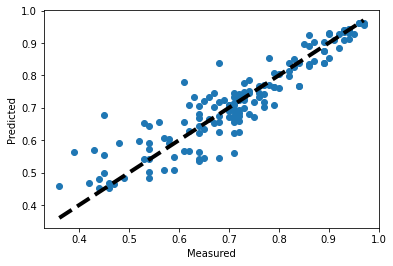

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(learning_rate = 1, min_samples_leaf = 4, subsample = 1, n_estimators = 5)

clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

In [61]:
print(r2_score(y_test, y_predict))
print(mse(y_test, y_predict))
print(mae(y_test, y_predict))

0.7853178269792583
0.04868753687141094
0.004474419208100174


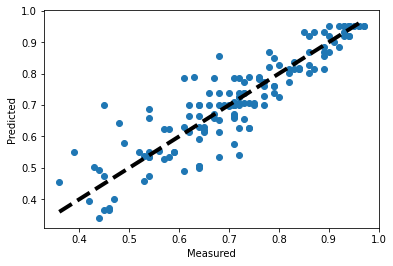

In [62]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()